In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import Constants as C
from PlotTool import PlotTool
from Loader import Loader
from Cuts import qlayerCut, firstHitInOuter, maxDistMaxDoms, balloonCut, qratio

import matplotlib.pyplot as plt


In [2]:
# Load the data
#load = Loader('NPE>1000')
load = Loader(C.basesel+'&& ImpLF_rchi2 > 80')

nue_juliet = load.getNuEJuliet(extraBranches=['rho_travel5'])
nue_nugen = load.getNuE()
nue_nugen['w'] = nue_nugen['wE2']

In [3]:
# Add some necessary variables
def addqratio(dt):
    dt['qratio'] = pd.Series(qratio(dt),index=dt.index)
    return dt

def addmaxdist(dt):
    dt['maxDist'] = pd.Series(maxDistMaxDoms(dt),index=dt.index)
    return dt

nue_juliet = addqratio(nue_juliet)
nue_nugen  = addqratio(nue_nugen)
nue_juliet = addmaxdist(nue_juliet)
nue_nugen  = addmaxdist(nue_nugen)


In [4]:
# move rho_travel5 temporarily
nue_juliet['rho_travel'] = nue_juliet['rho_travel5']

In [5]:
print len(nue_juliet)
print len(nue_nugen)

45173
954922


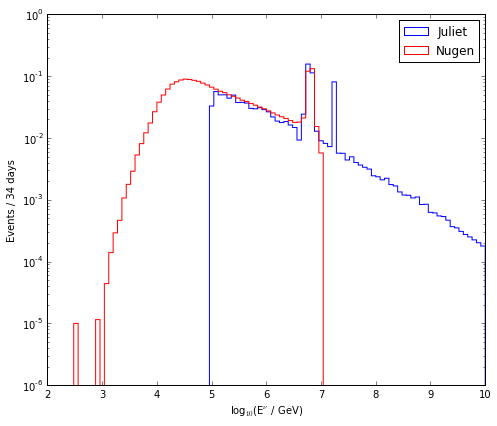

In [6]:
fig, ax = plt.subplots(ncols=1,figsize=(7,6))

plt.hist(np.log10(nue_juliet.juliet_PrimE),
         weights=nue_juliet.wE2,
         histtype='step',bins=100,
         label='Juliet',
         range=(2,10))
         

plt.hist(np.log10(nue_nugen.PrimaryNeutrinoEnergy),
         weights=nue_nugen.wE2,
         color='r',
         histtype='step',bins=100,
        label='Nugen',
        range=(2,10))
plt.xlabel(r'log$_{10}$(E$^{\nu}$ / GeV)')
plt.ylabel(C.lt_label)
plt.legend(loc='upper right')

ax.set_ylim([1e-6,1])
ax.set_yscale('log')
plt.tight_layout()
#plt.savefig('../plots/JulietComp/EnergyComp.png')

In [7]:
temp = nue_nugen[ (nue_nugen.PrimaryNeutrinoEnergy > 1e6) & (nue_nugen.PrimaryNeutrinoEnergy < 1e7)]
print sum(temp.wE2)
temp2 = nue_juliet[ (nue_juliet.juliet_PrimE > 1e6) & (nue_juliet.juliet_PrimE < 1e7)]
print sum(temp2.wE2) 
print 1 - sum(temp.wE2)/sum(temp2.wE2)


0.469938003287
0.456283390246
-0.0299257289079


In [5]:
# Simple method to plot basic vars
def plot(info, var, xl, nbins, xmin, xmax, logy, ysf=1e-10):
    fig, ax = plt.subplots(ncols=1,figsize=(7,6))
    ymax = -9999
    for i in range(len(info['data'])):
        dt  = info['data'][i]
        col = info['col'][i]
        lbl = info['lbl'][i]
        ls  = info['ls'][i]
        w   = info['w'][i]
        bc, bins, p = plt.hist(dt[var].as_matrix(),
                               weights=dt[w].as_matrix(),
                               bins=nbins, range=(xmin,xmax),
                               color=col, label=lbl, lw=1.5,
                               histtype='step', ls = ls
                               )
        
        plt.xlabel(xl)
        plt.ylabel(C.lt_label)
        plt.tight_layout()
    
        if bc.max() > ymax:
            ymax = bc.max()
    
    if logy:
        ax.set_yscale('log')
        plt.ylim([ymax*ysf,5*ymax])
    plt.legend(loc='best',fontsize='medium')
    plt.grid()
    
# Also initialize the plot tool
pt = PlotTool()

In [6]:
# info to be plotted
nue_nugen_reg = nue_nugen[ (nue_nugen.PrimaryNeutrinoEnergy >= 1e5) & (nue_nugen.PrimaryNeutrinoEnergy <= 1e6)]
nue_juliet_reg = nue_juliet[ (nue_juliet.juliet_PrimE >= 1e5) & (nue_juliet.juliet_PrimE <= 1e6)]

info = {'data' : [nue_nugen_reg, nue_juliet_reg],
        'names'  : ['NuGen', r'Juliet'],
        'colors'  : ['r','b'],
        'weights'    : ['wE2','wE2'],
        'ls'   : ['solid','solid'],
        'lw' : [1.5,1.5],
        'marker' : [' ',' ']
       }

In [7]:
# Setup the variables
variables = {'hs_z_travel' : [50,-500,500, 'ztravel','z-travel [m]'],
             'rho_travel'  : [100, 0, 1000, 'rhotravel', r'$\rho$-travel [m]'],
             'log10(hs_q_tot_pulses)' : [40, 3, 7, 'logqtot','log10(NPE)'],
             'log10(NPE)'     : [40, 3, 7, 'lognpe','log10(NPE) (portia)'],
             'qratio'         : [50,0,1,'qratio','qratio'],
             'hm_nhit_doms'   : [50,0,1500, 'hitdoms', r'N Hit Doms'],
            'Nch'            : [20,0,1500, 'Nch', 'N Channel (portia)'],
             'cumuAt600ns' : [25,0,1,'cumuAt600ns','Cumulative @ 600ns'],
             #'widthAt50' : [50,0,2000,'widthAt50','Width @ 50% [ns]'],
             #'widthAt70' : [50,0,2000,'widthAt70','Width @ 70% [ns]'],
             'maxDist' : [25,0,1000,'maxDist','Max Dist 3 Largest Charge DOms'],
             'ImpLF_rchi2' : [50,0,500,'rchi2',r'Reduced $\chi^{2}$'],
             #'q_largest-q_onstring' : [100,-5000,2000,'qDiff','q_largest - q_onstring'],
             'hs_cogz' : [50,-500,500,'cog_z','COG z [m]'],
             'sqrt(hs_cogx*hs_cogx+hs_cogy*hs_cogy)' : [30,0,600,'cog_rho',r'COG $\rho$'],
            'tlarge5[0]-tearly5[0]'  : [100, 0, 10000, 'tEarlyMinusLarge', 'tlarge-tearly'],

             #'bQRat' : [50,1,25,'balloonQRatio_zoom',r'NPE$^{tot}$ / NPE$^{MaxDom}$ (zoomed)'],
            }

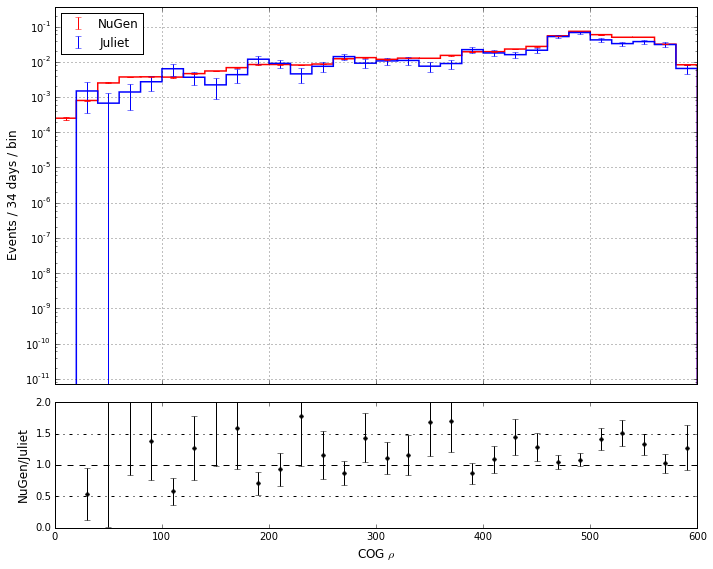

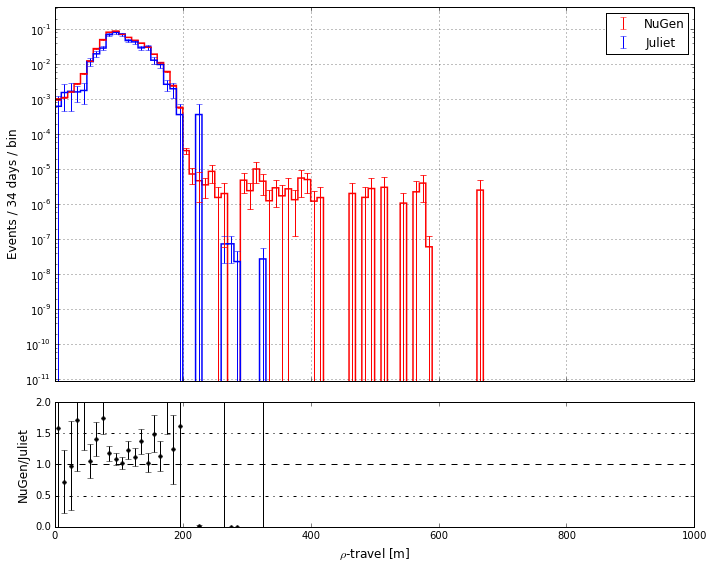

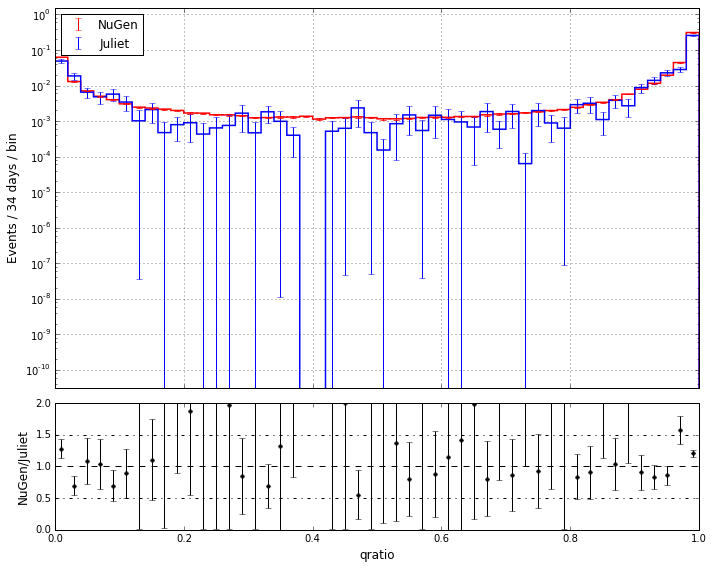

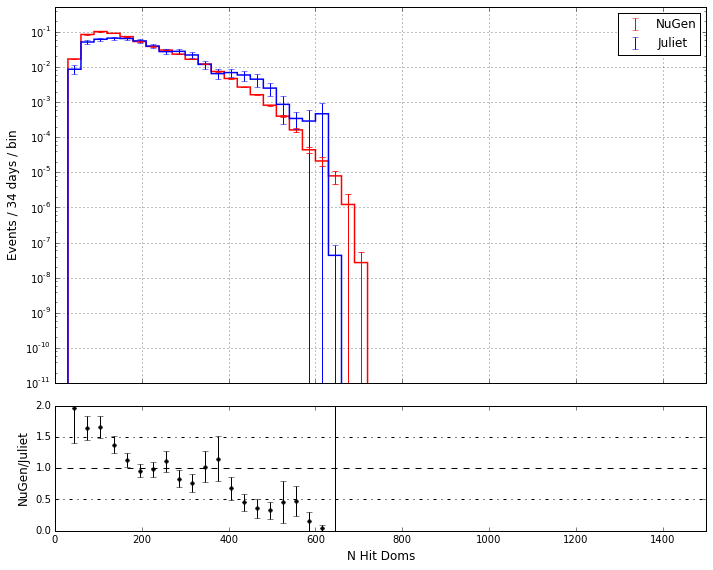

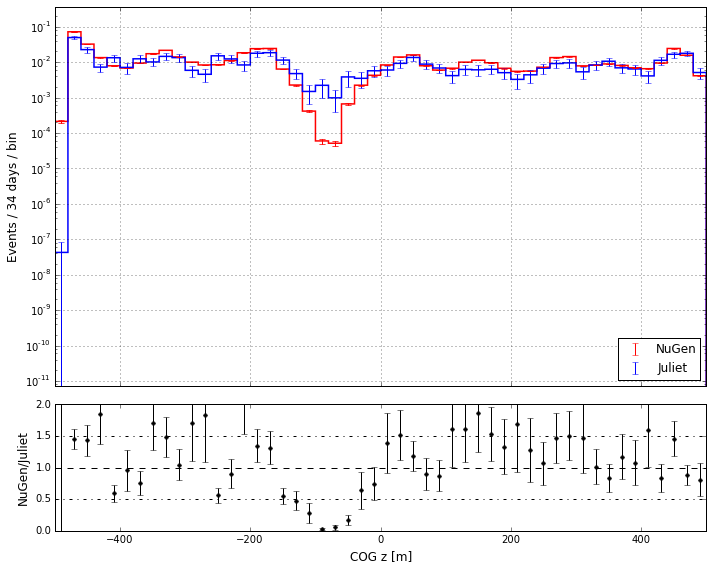

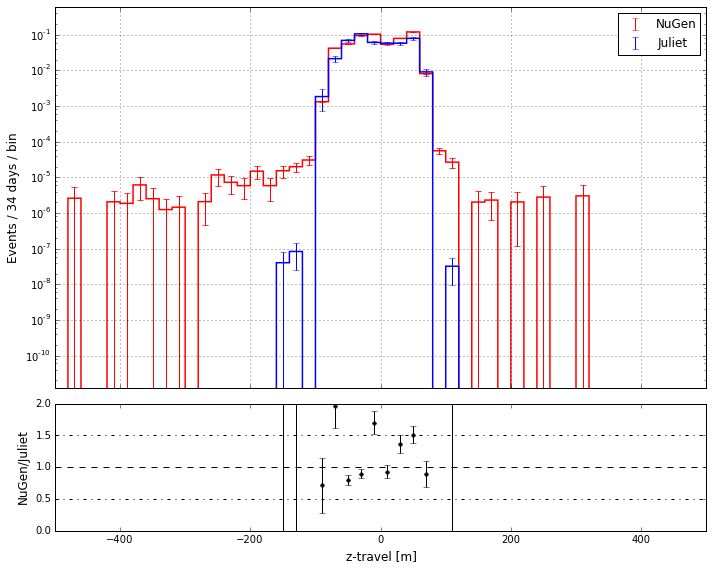

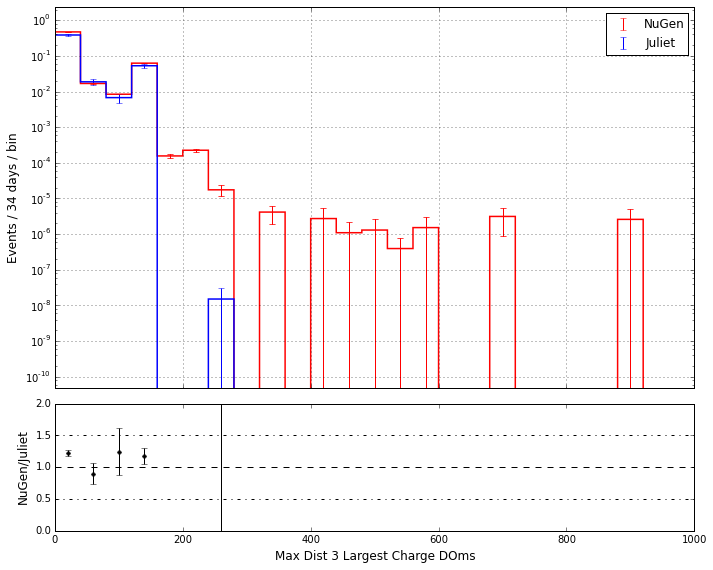

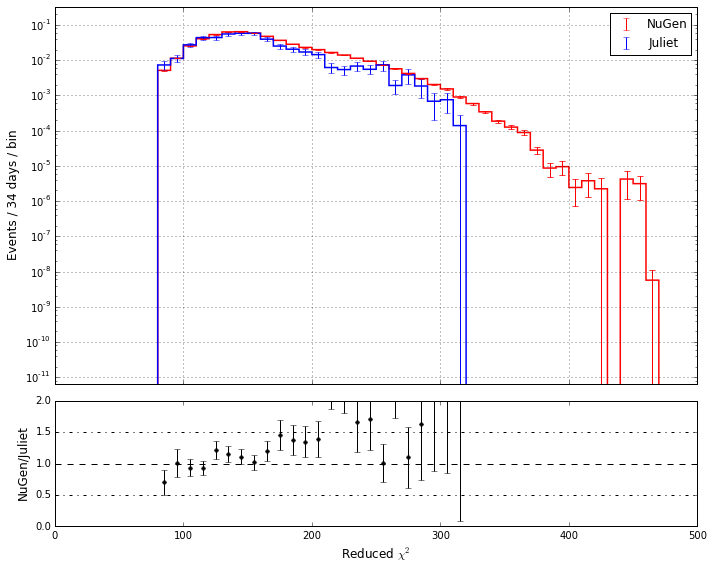

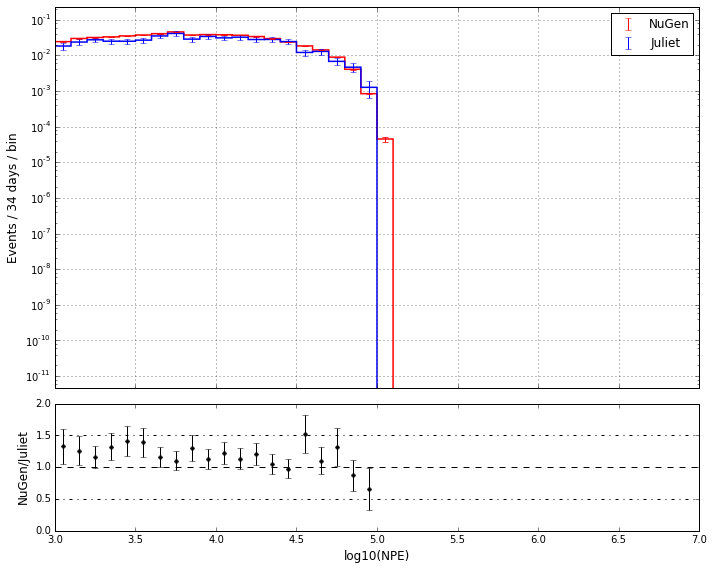

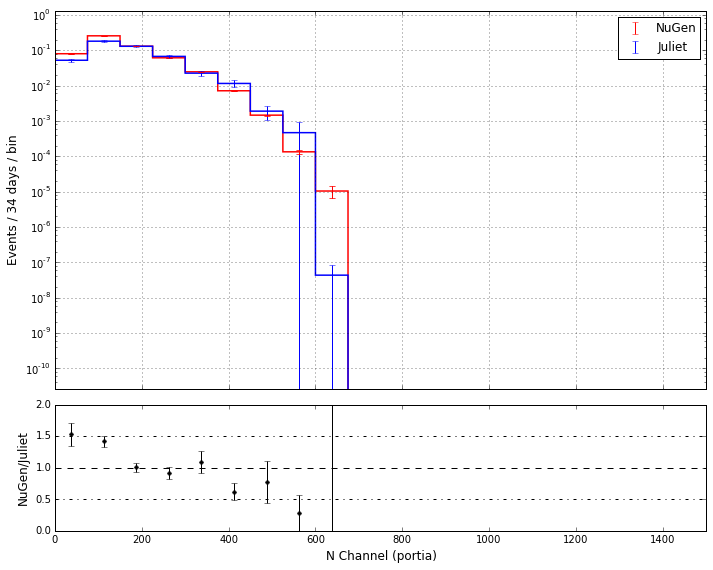

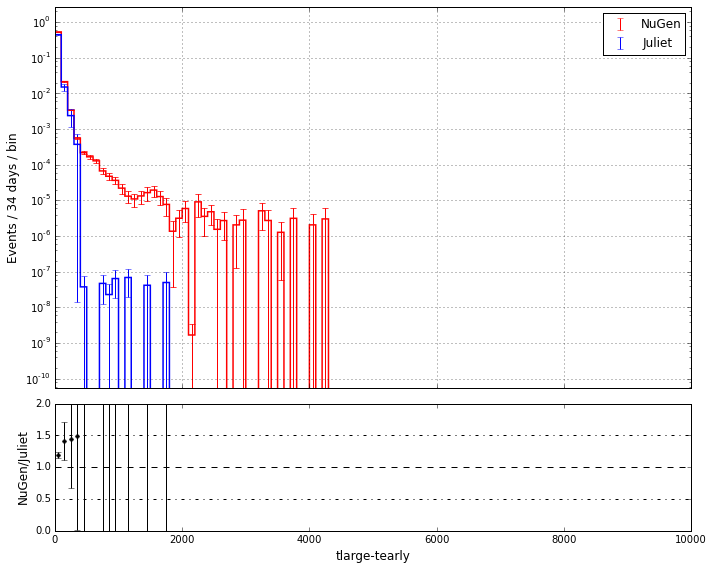

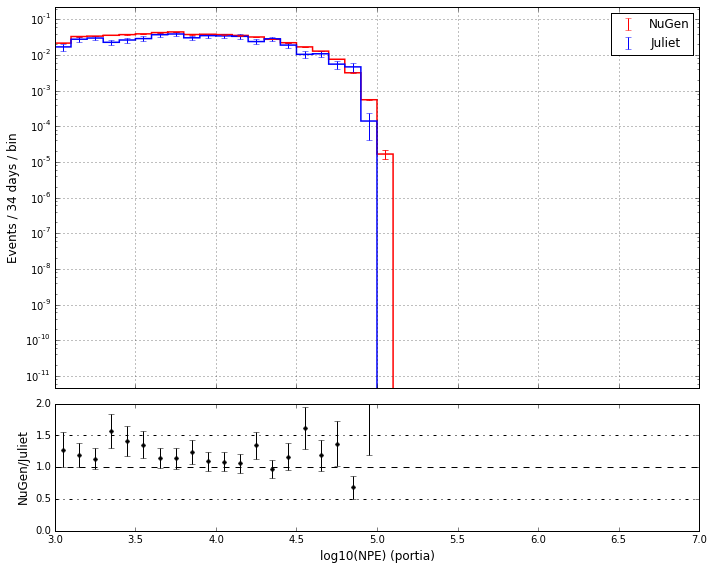

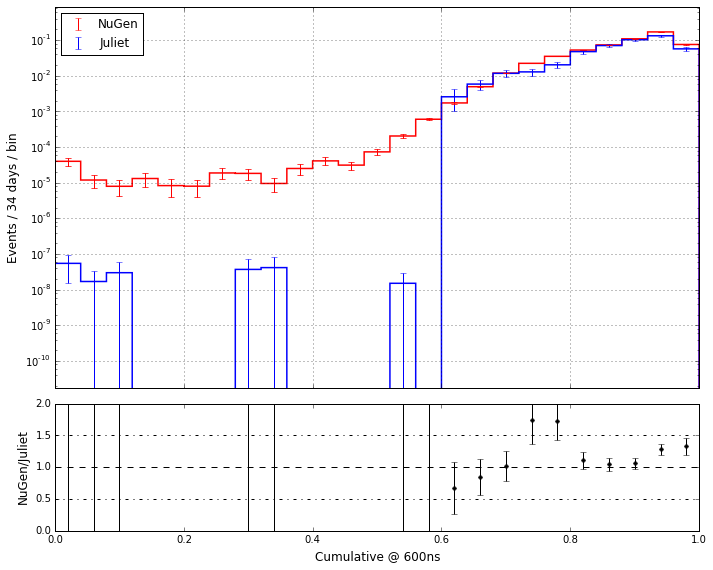

In [8]:
# Loop over variables and plot
savedir = '../plots/JulietComp/baseline_wimplf_domsimulator/'
for var in variables:
    lims = variables[var]
    
    #plot(info, var, lims[4], lims[0], lims[1], lims[2], True)
    pt.plotStackedRatio(info,var,
                        lims[4],
                        lims[0],lims[1],lims[2],
                        1e-10,True,False,False,'',
                       'NuGen/Juliet')
    
    #plt.savefig(savedir+lims[3]+'.png')


In [9]:
# Now include the qratio requirement
nue_juliet_reg = qlayerCut(nue_juliet_reg,False,0.8)
nue_nugen_reg  = qlayerCut(nue_nugen_reg,False,0.8)

info = {'data' : [nue_nugen_reg, nue_juliet_reg],
        'names'  : ['NuGen', r'Juliet'],
        'colors'  : ['r','b'],
        'weights'    : ['wE2','wE2'],
        'ls'   : ['solid','solid'],
        'lw' : [1.5,1.5],
        'marker' : [' ',' ']
       }

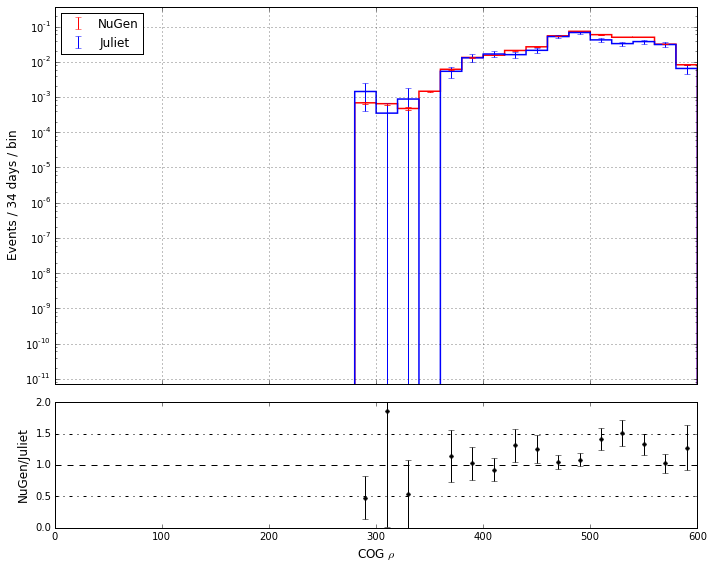

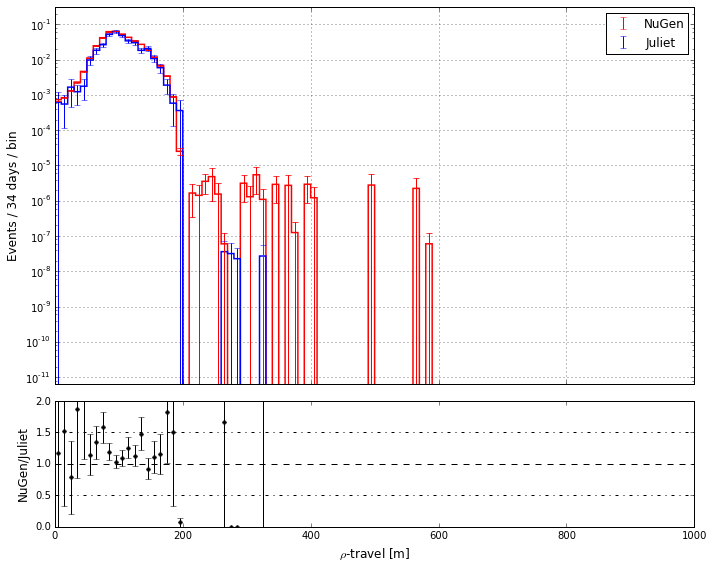

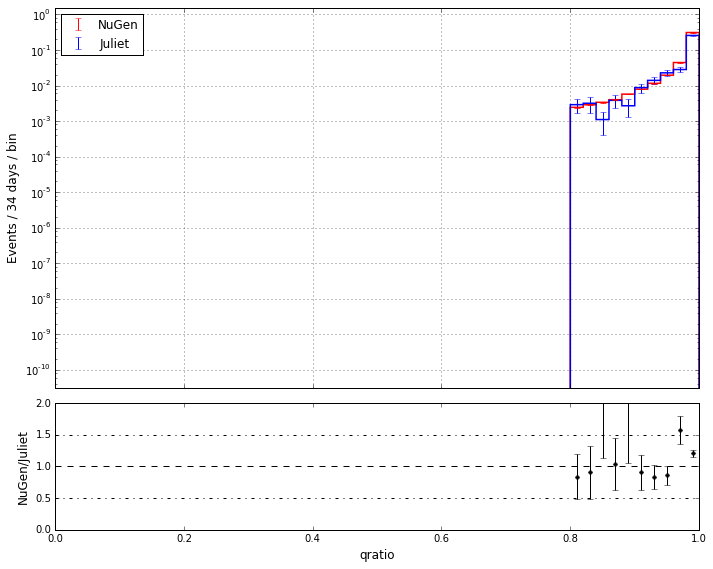

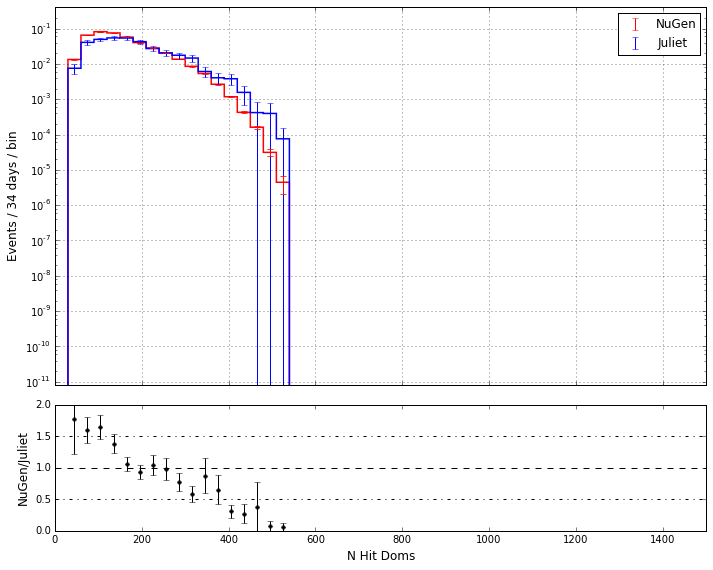

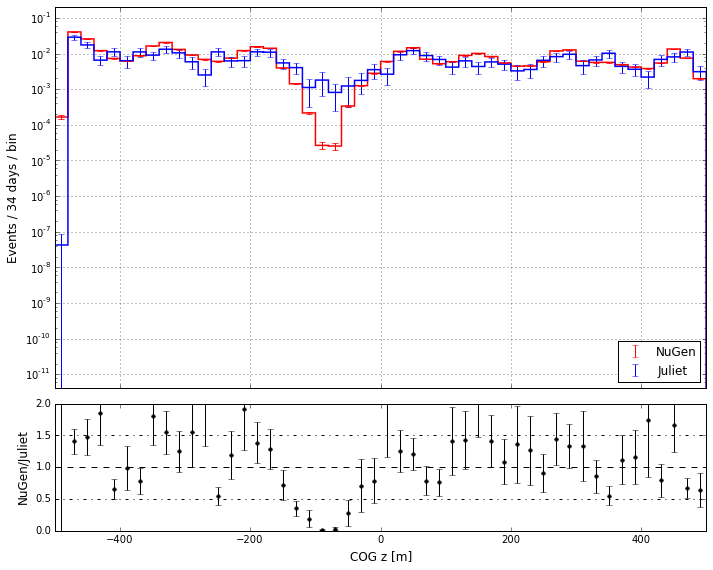

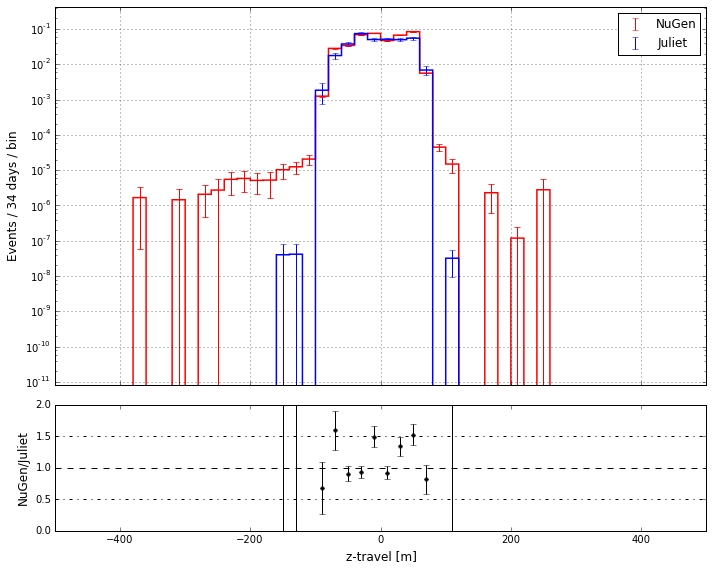

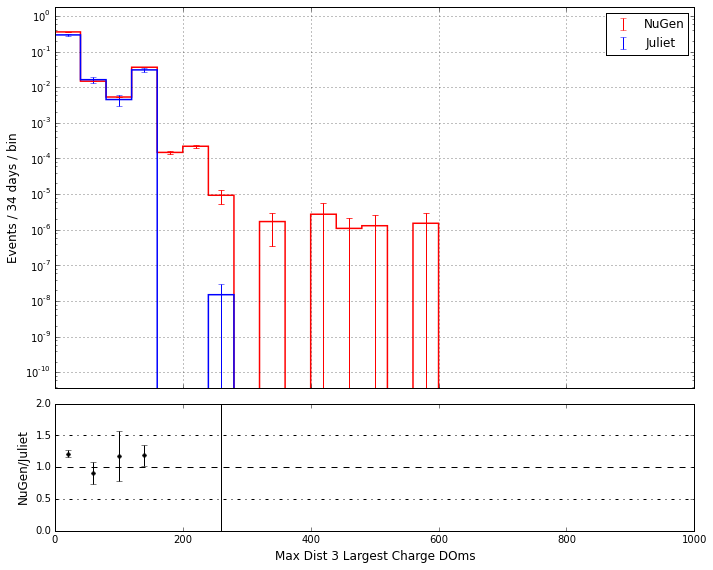

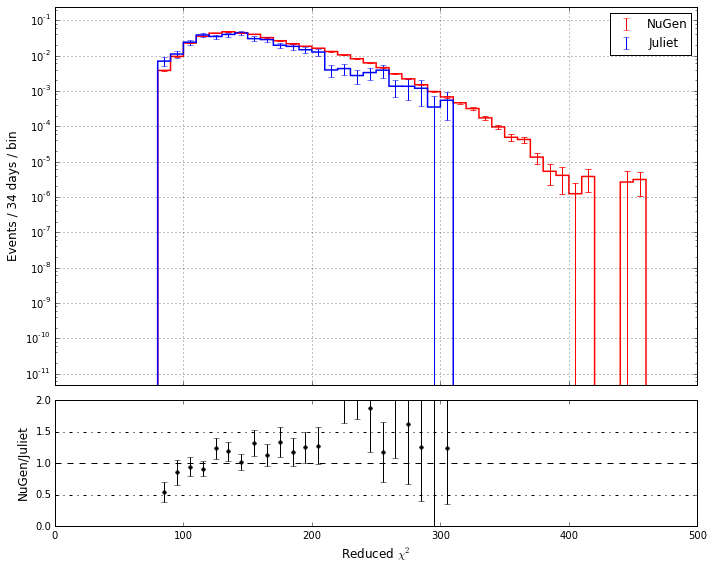

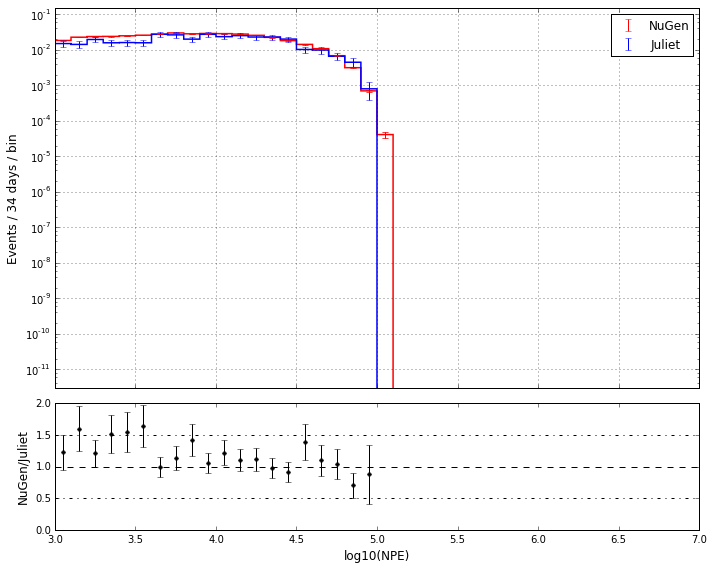

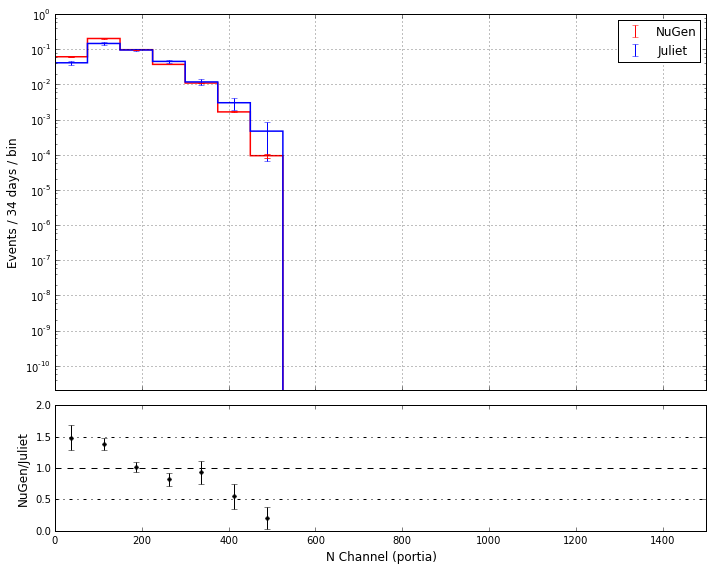

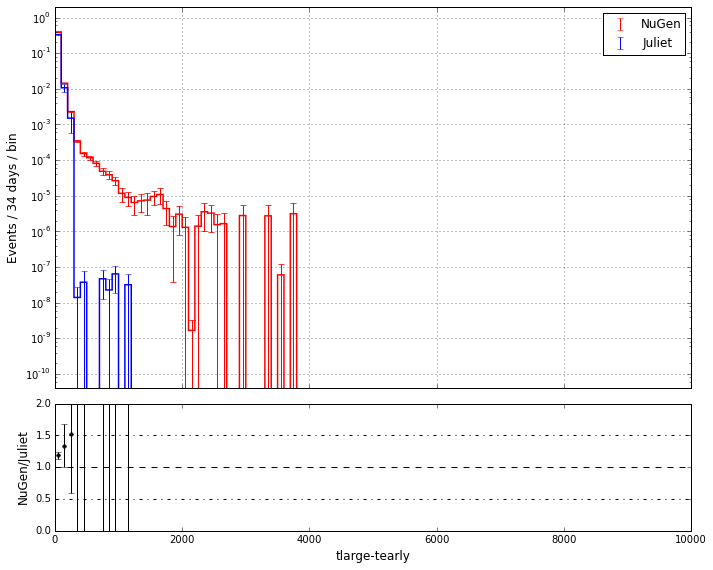

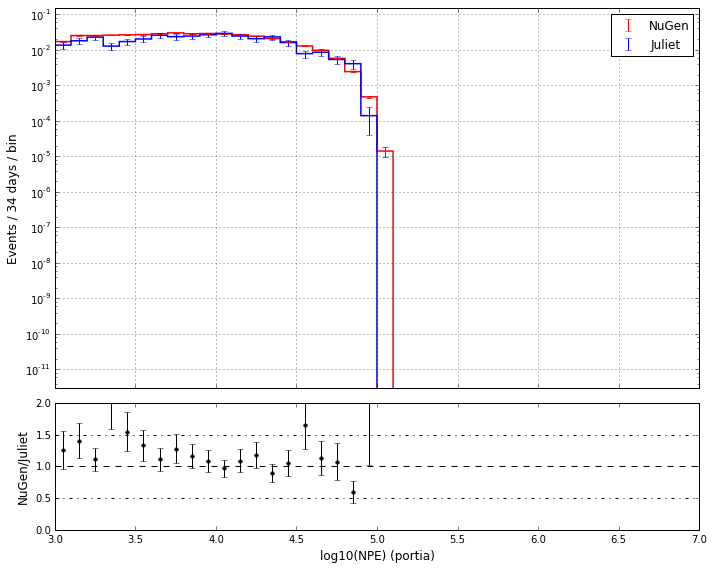

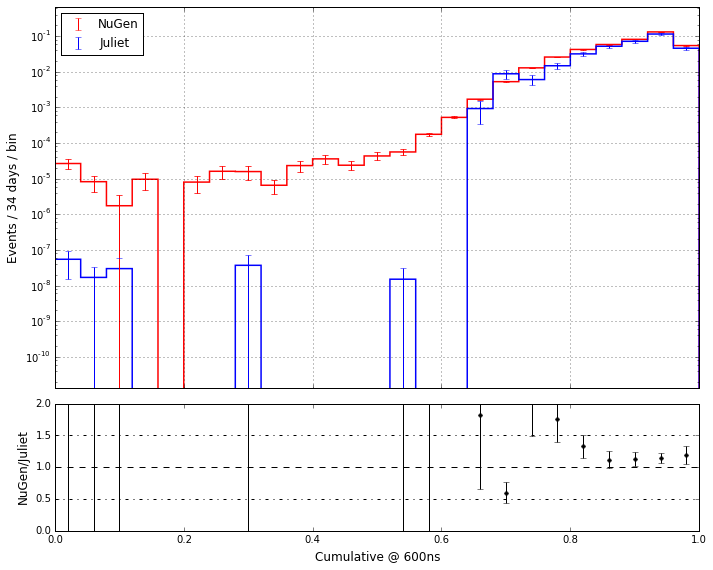

In [10]:
# Loop over variables and plot
savedir = '../plots/JulietComp/baseline_wimplf_qratio_domsimulator/'
for var in variables:
    lims = variables[var]
    
    #plot(info, var, lims[4], lims[0], lims[1], lims[2], True)
    pt.plotStackedRatio(info,var,
                        lims[4],
                        lims[0],lims[1],lims[2],
                        1e-10,True,False,False,'',
                       'NuGen/Juliet')
    
    #plt.savefig(savedir+lims[3]+'.png')

In [11]:
# Include the timing cut and balloon cut
def finalcuts(dt):
    dt = dt[ dt['tlarge5[0]-tearly5[0]'] < 200 ]
    dt = balloonCut(dt)
    return dt

nue_juliet_reg = finalcuts(nue_juliet_reg)
nue_nugen_reg  = finalcuts(nue_nugen_reg)

In [12]:
info = {'data' : [nue_nugen_reg, nue_juliet_reg],
        'names'  : ['NuGen', r'Juliet'],
        'colors'  : ['r','b'],
        'weights'    : ['wE2','wE2'],
        'ls'   : ['solid','solid'],
        'lw' : [1.5,1.5],
        'marker' : [' ',' ']
       }

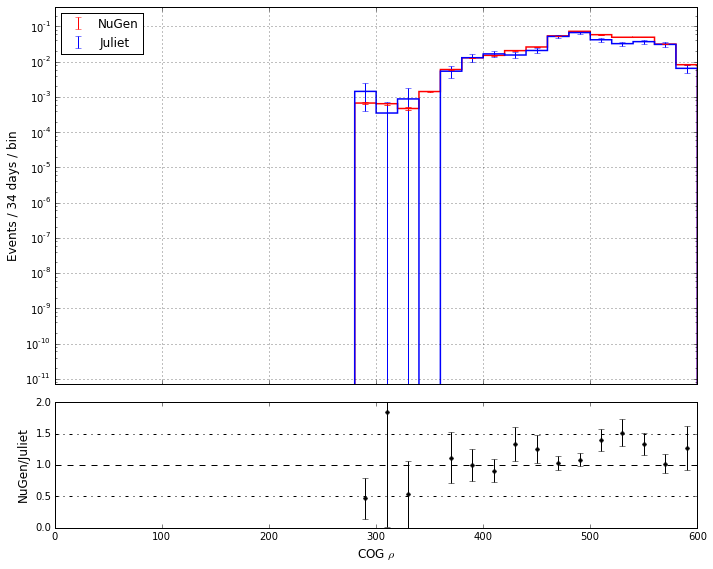

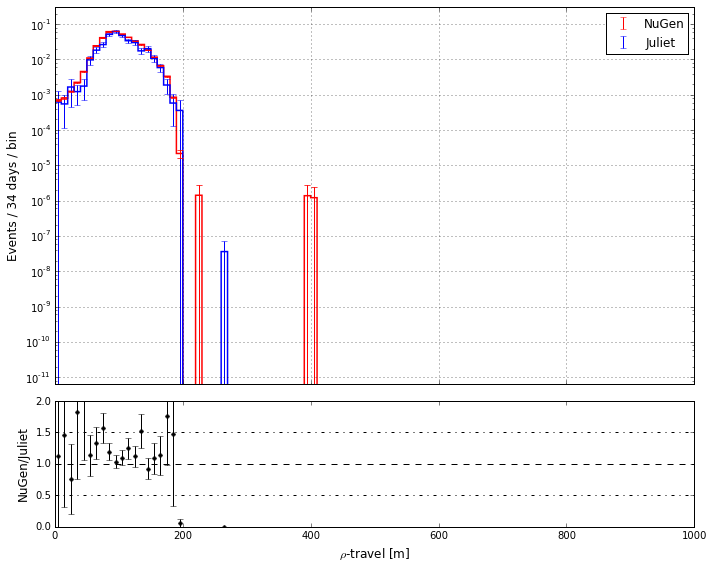

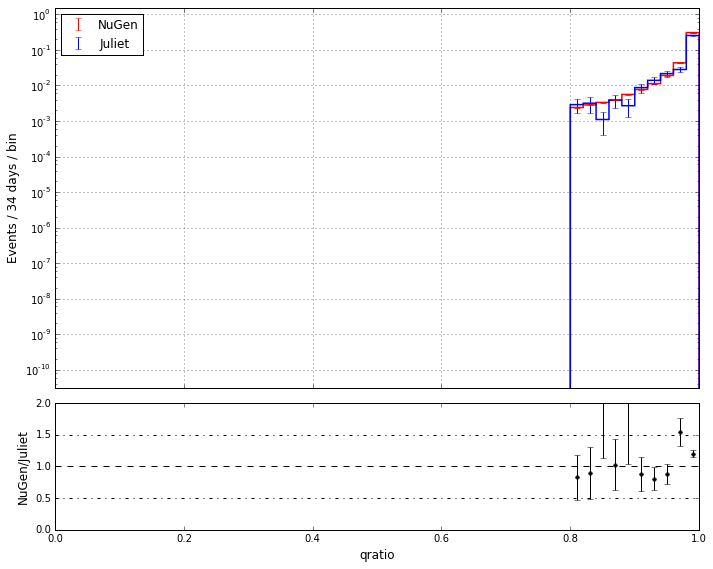

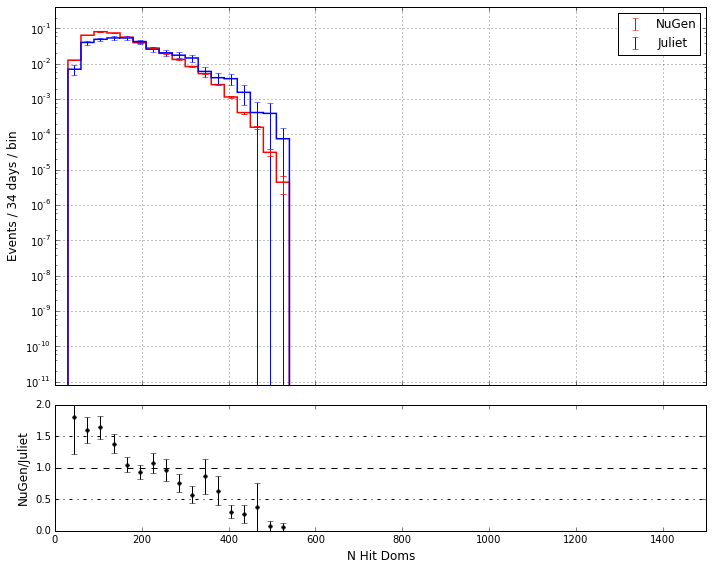

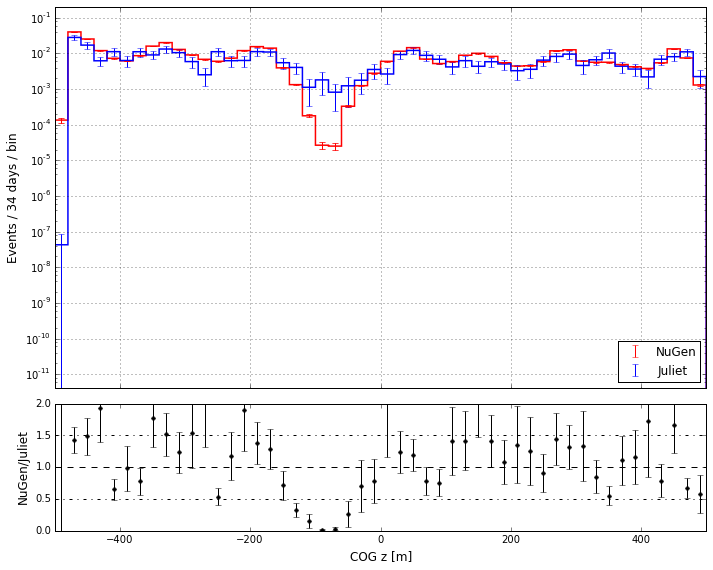

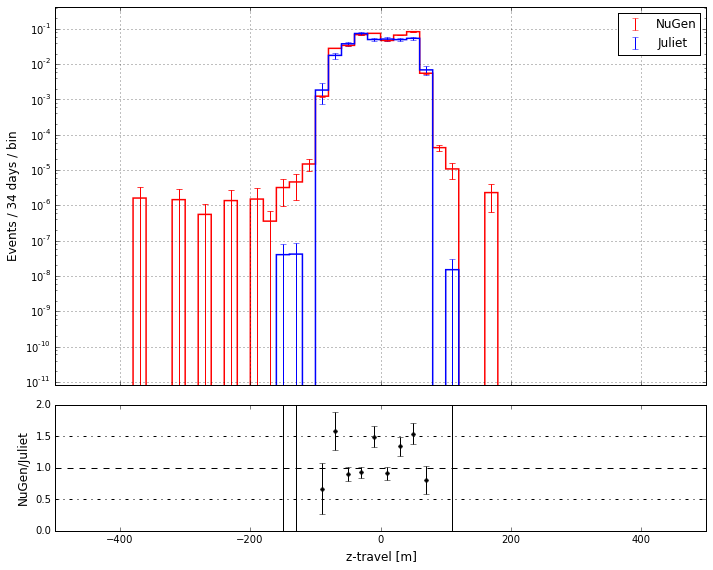

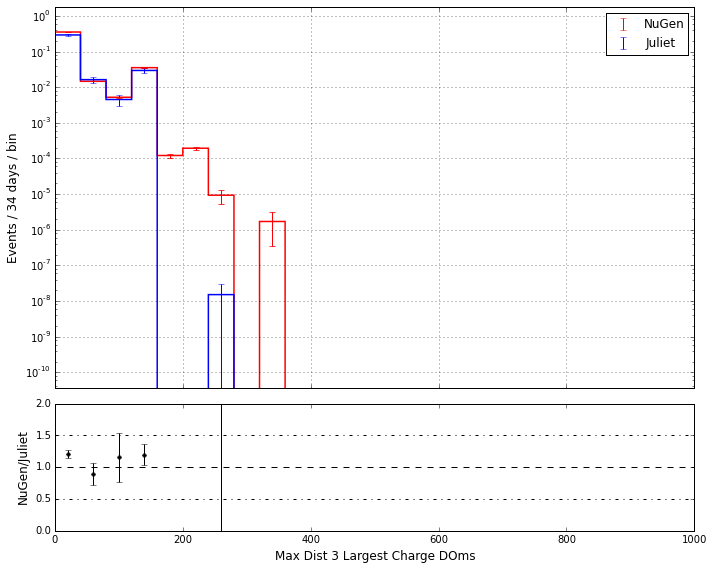

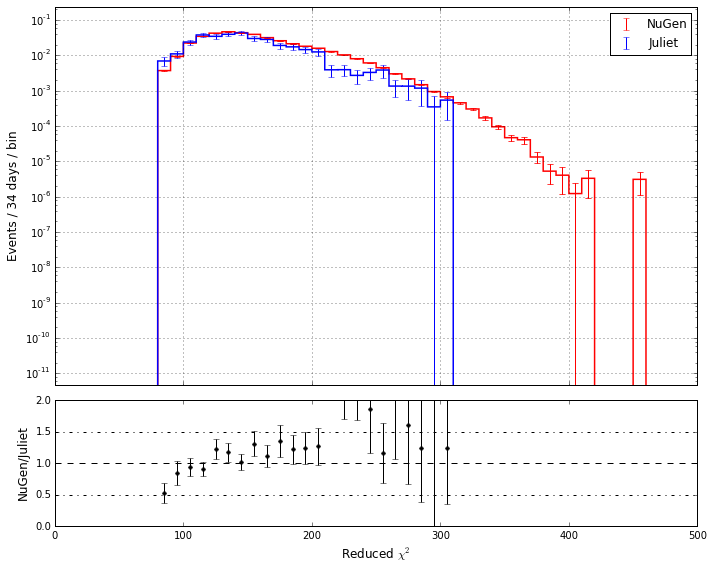

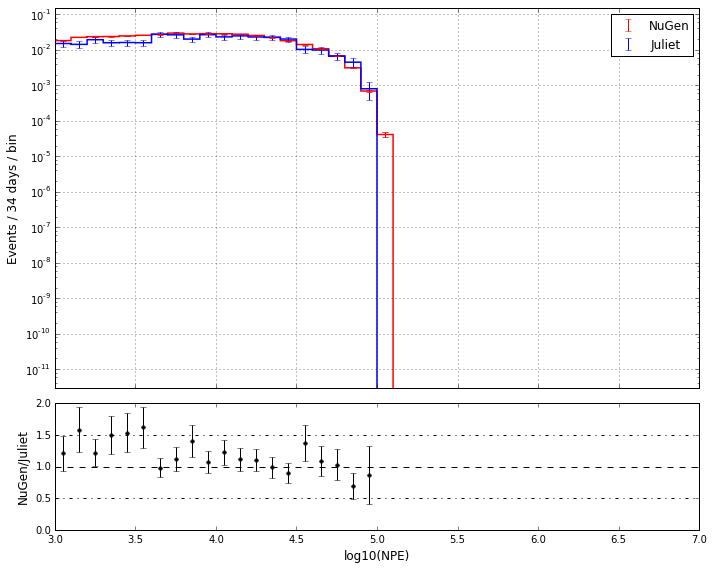

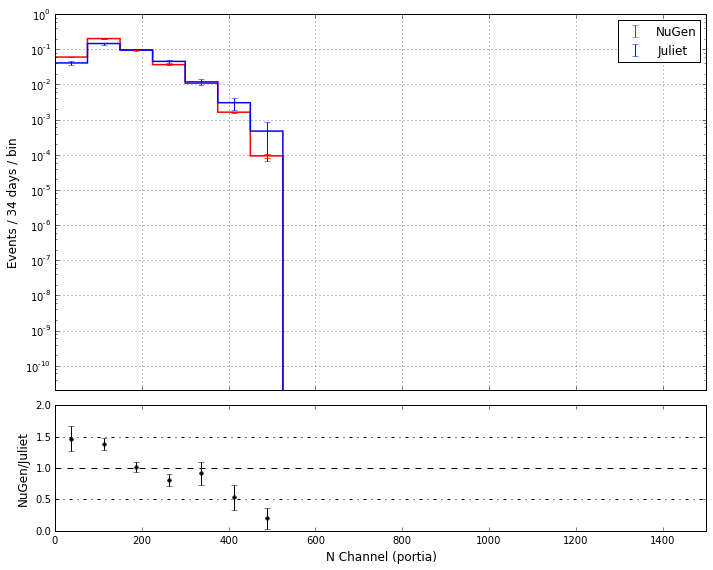

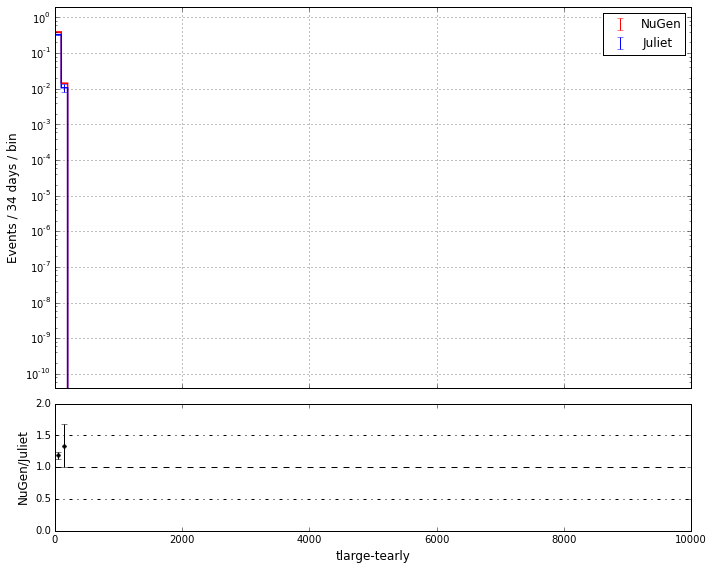

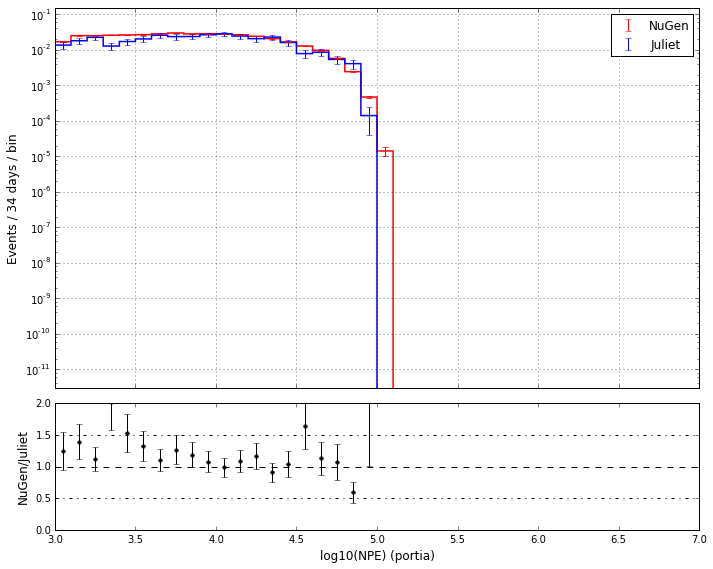

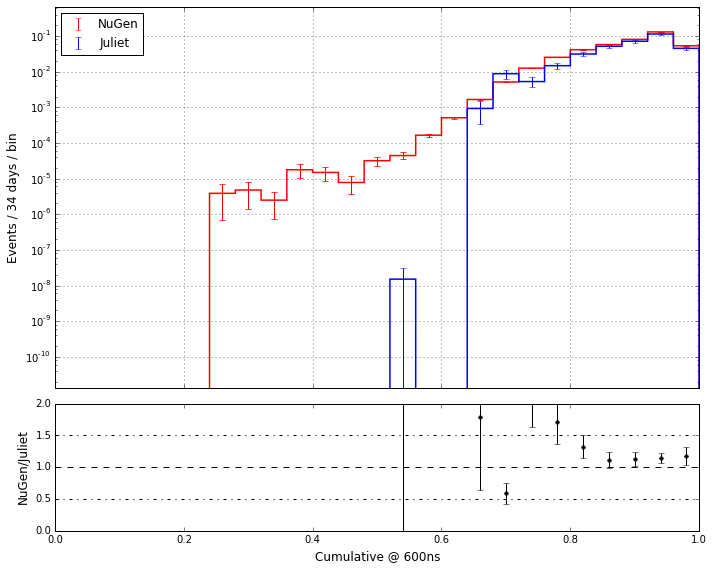

In [13]:
# Loop over variables and plot
savedir = '../plots/JulietComp/baseline_wimplf_qratio_timing_ballooncut_domsimulator/'
for var in variables:
    lims = variables[var]
    
    #plot(info, var, lims[4], lims[0], lims[1], lims[2], True)
    pt.plotStackedRatio(info,var,
                        lims[4],
                        lims[0],lims[1],lims[2],
                        1e-10,True,False,False,'',
                       'NuGen/Juliet')
    
    plt.savefig(savedir+lims[3]+'.png')

In [16]:
#Break up the nugen like before
# Break into testing and training data sets
from sklearn.cross_validation import train_test_split
nue_nugen_reg['target'] = pd.Series(np.ones(len(nue_nugen_reg),dtype=int),index=nue_nugen_reg.index)
trainfrac = 0.5
X_nue_train, X_nue_test, y_nue_train, y_nue_test = train_test_split(nue_nugen_reg,
                                                                    nue_nugen_reg['target'],
                                                                    train_size=trainfrac,
                                                                    random_state=194637)


In [36]:
# Now load the classifer
from sklearn.externals import joblib
clf = joblib.load('../models/bdt_hyperparamopt.pkl')

In [38]:
nue_juliet_reg['scores'] = pd.Series(clf.decision_function(nue_juliet_reg[C.bdt_features]),index=nue_juliet_reg.index)
#X_nue_test['scores'] = pd.Series(clf.decision_function(X_nue_test[C.bdt_features]),index=X_nue_test.index)
nue_nugen_reg = nue_nugen_reg.dropna()
nue_nugen_reg['scores'] = pd.Series(clf.decision_function(nue_nugen_reg[C.bdt_features]),index=nue_nugen_reg.index)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.729311509658
1.59984414363


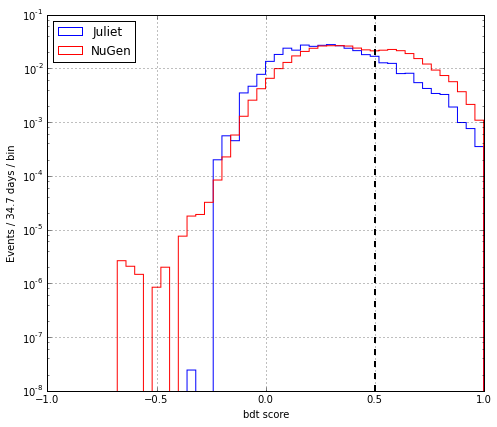

In [42]:
print sum(nue_juliet_reg[ nue_juliet_reg.scores > 0.5 ].wE2) * 365/34.7
#print sum(X_nue_test[ X_nue_test.scores > 0.5 ].wE2*2) * 365/34.7
print sum(nue_nugen_reg[ nue_nugen_reg.scores > 0.5 ].wE2) * 365/34.7

fig,ax = plt.subplots(ncols=1,figsize=(7,6))

nue_juliet_reg['scores'].hist(weights=nue_juliet_reg.wE2.as_matrix(),
                              bins=50,range=(-1,1),
                              histtype='step',
                             label='Juliet')
#X_nue_test['scores'].hist(weights=X_nue_test.wE2.as_matrix()*2,
#                         bins=50,range=(-1,1),
#                         histtype='step',
#                         color='r',
#                         label='NuGen')
nue_nugen_reg['scores'].hist(weights=nue_nugen_reg.wE2.as_matrix(),
                         bins=50,range=(-1,1),
                         histtype='step',
                         color='r',
                         label='NuGen')
plt.plot([0.5,0.5],[1e-8,1e-1],color='black',lw=2,ls='dashed')
plt.xlabel('bdt score')
plt.ylabel('Events / 34.7 days / bin')
ax.set_yscale('log')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('../plots/JulietComp/bdtscore_comparison_100TeV_1PeV_Range.png')
